# Debias


In [1]:
%matplotlib inline

import os,sys
import numpy as np
import healpy as hp
import pandas as pd
import gmca4im_lib2 as g4i
import astropy.io.fits as fits
import Extension4BINGO as cs
import matplotlib
from   matplotlib import rc
import matplotlib.pyplot as plt
import time
from   IPython.display import clear_output
rc('text', usetex=True)
font = {'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

In [2]:
#####################################
#paths
#####################################
pathcls       = "/home/marins/Documents/Programmation/BINGO/Component Separation/gmca4im/cls_output" #Path to the cls outputs from NoiseDebiasing2GMCA_building code results
dir_hi        = "21cm"        #Directory name of the cls of the 21cm reconstruction maps
dir_fg        = "foregrounds" #Directory name of the cls of the foregrounds reconstruction maps
dir_prior     = "prior"       #Directory name of the cls of the prior maps, that can be (21cm + noise) masked
dir_noise     = "noise"       #Directory name of the cls of the noise maps, that can be (WhiteNoise or/and 1/f) masked
dir_pure      = "pure"        #Directory name of the cls of the (only) 21cm maps, masked or not.
dir_projnoise = "projnoise"   #Directory name of the cls of the noise maps, that can be (WhiteNoise or/and 1/f) masked
dir_projpure  = "projpure"    #Directory name of the cls of the (only) 21cm maps, masked or not.
dir_projprior = "projprior"   #

#All of cls should be obtained from the same L's (seeds) 
####################################
# seed number 
####################################
seed_used  = 10        #L0 used for analysis, ie, the realisation used for analysis

## Filipe Model

$\displaystyle  \hat{C}^{\scriptsize\textrm{GMCA}}_{\ell} = \frac{C^{\scriptsize\textrm{GMCA},\textrm{L}_0}_{\ell}}{S} - \langle C^{\tiny\textrm{NOISE}}_{\ell}\rangle$

$\displaystyle S = \langle \frac{C^{\scriptsize\textrm{GMCA},\textrm{L}_i}_{\ell}}{C^{\scriptsize\textrm{prior},\textrm{L}_i}_{\ell}} \rangle$

In [7]:
Cls = cs.loadcls(pathcls,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])  
cls = cs.noisedebiasing(Cls_=Cls, seed_used=seed_used, dir_hi = dir_hi, dir_prior=dir_prior, dir_noise = dir_noise, type_="filipe")
Cls_ndb   = cls["Cls_debias"]
S         = cls["S"]
Cls_noise = cls["Cls_noise"]

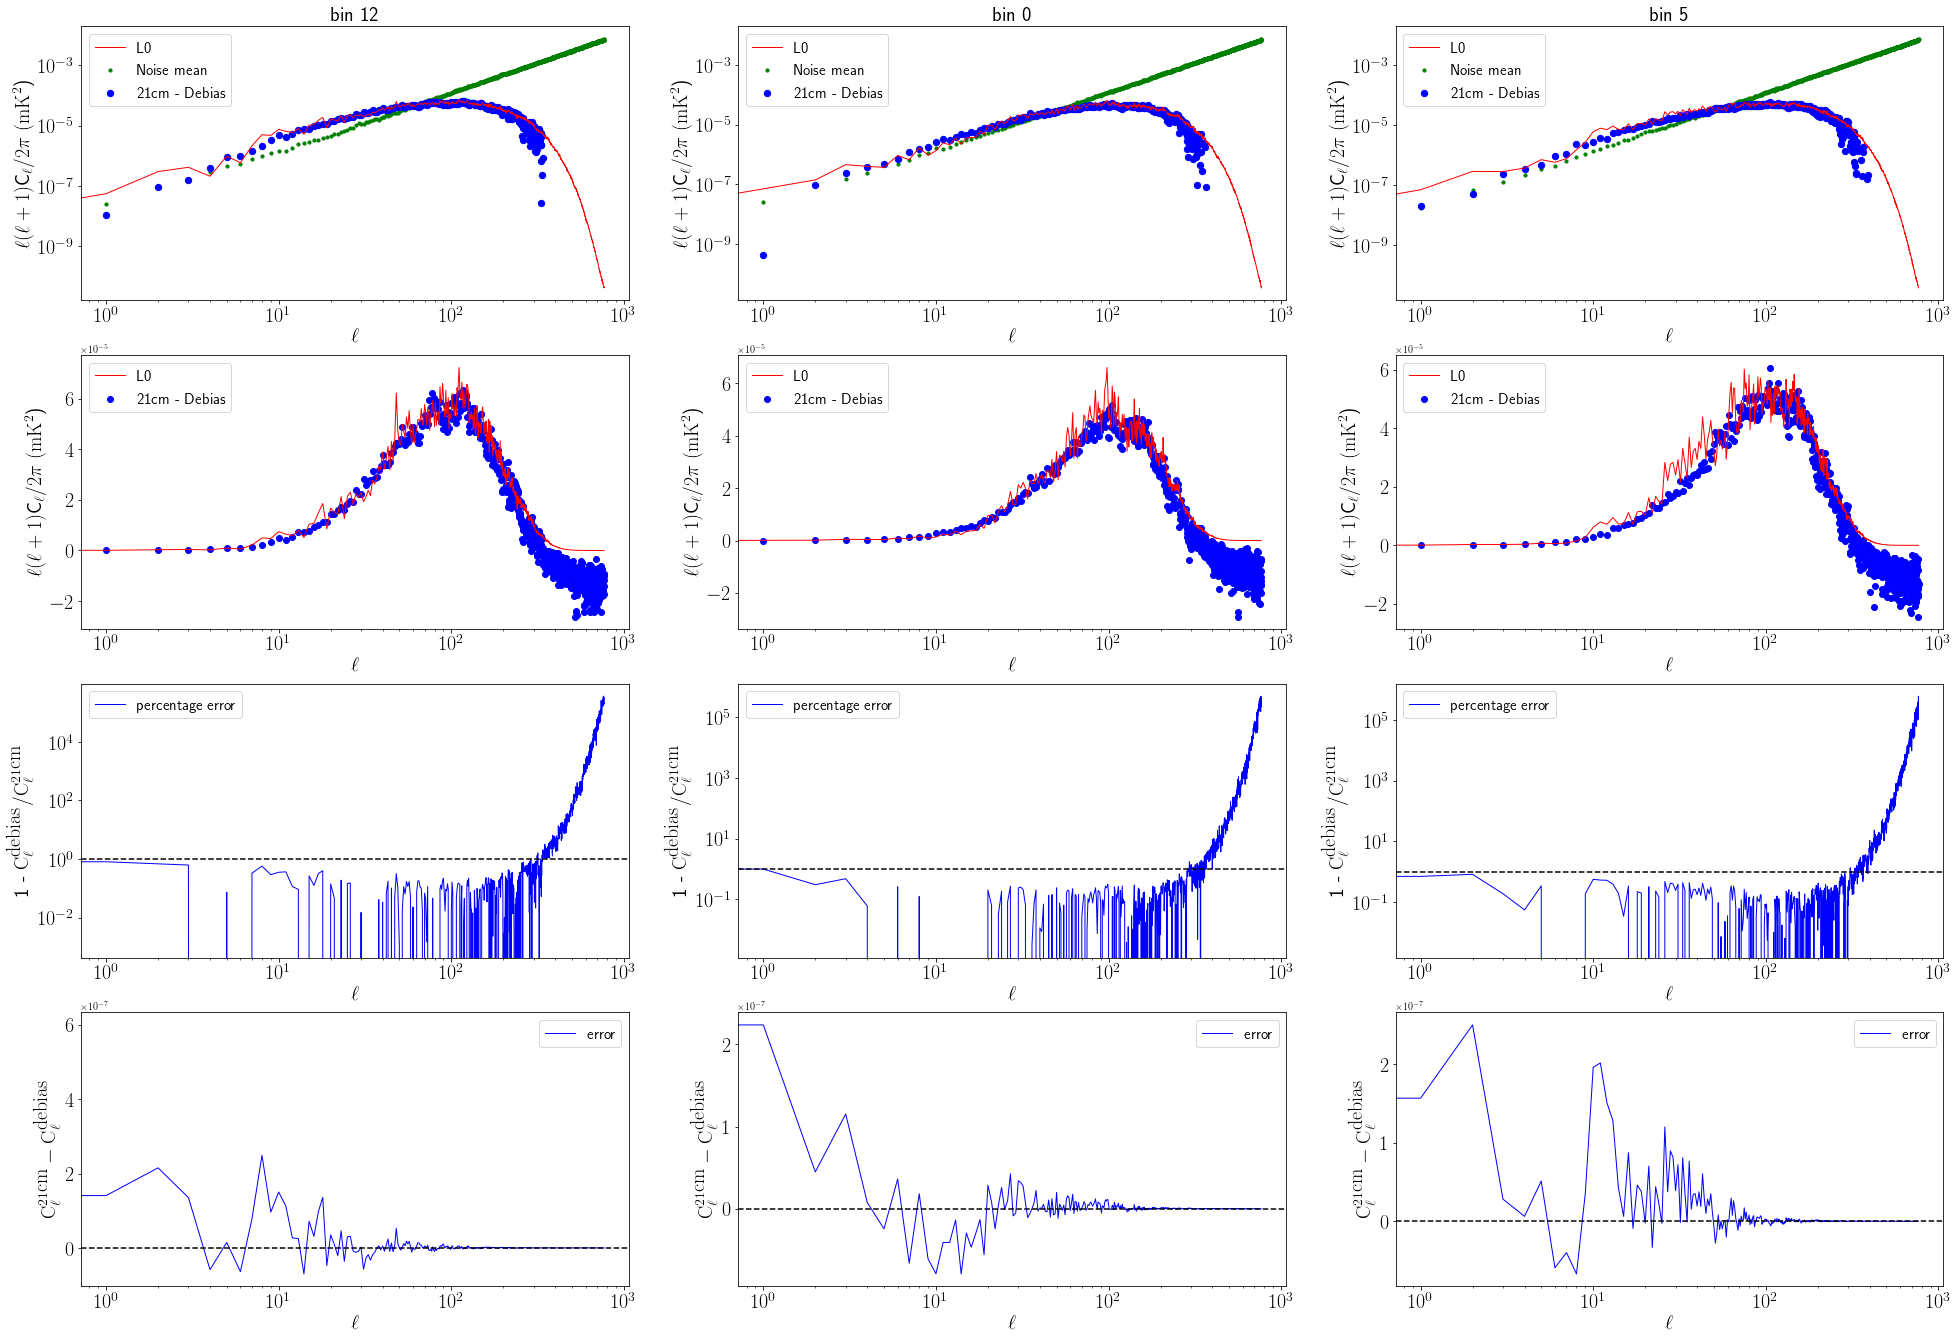

In [8]:
Cls = cs.loadcls(pathcls,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])
fig      = plt.figure()

numplots = 3
grid     = plt.GridSpec(4,2*numplots,top=4.5,right=3*numplots)
nu,nl = Cls_ndb.shape
l     = np.arange(nl)
fact  = l*(l+1)/(2*np.pi)
L0    = "L{}".format(seed_used)

for col,i in enumerate(np.random.randint(nu,size=numplots)):
    ax = plt.subplot(grid[0,col])
    #print("bin: {}".format(i))
    plt.title("bin {}".format(i), fontsize=20)
    plt.plot(   l,fact*Cls["pure"][L0][i] , color="red"  , label="L0"           , linewidth =1)
    plt.scatter(l,fact*Cls_noise[i]       , color="green", label="Noise mean"   , s=10)
    plt.scatter(l,fact*Cls_ndb[i]         , color="blue" , label="21cm - Debias", s=40)
    plt.xscale("log")
    plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ $(\textrm{mK}^2$)", fontsize=20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.legend(fontsize=15)

    ax = plt.subplot(grid[1,col])
    #print("bin: {}".format(i))
    #plt.title("bin {}".format(i), fontsize=20)
    plt.plot(l,fact*Cls["pure"][L0][i] , color="red"  , label="L0"       , linewidth =1)
    plt.scatter(l,fact*Cls_ndb[i]      , color="blue" , label="21cm - Debias", linewidth =1)
    #plt.scatter(l,fact*Cls_noise[i]    , color="green", label="Debiasing", linewidth =1)
    plt.xscale("log")
    #plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ $(\textrm{mK}^2$)", fontsize=20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.legend(fontsize=15)    
    
    ax = plt.subplot(grid[2,col])
    plt.plot(l,(Cls["pure"][L0][i]-Cls_ndb[i])/Cls["pure"][L0][i] , color="blue", label="percentage error", linewidth =1)
    plt.axhline(y=1, linestyle="dashed", color="black")
    plt.xscale("log")
    plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.ylabel(r"1 - $\textrm{C}^{\textrm{debias}}_{\ell}/\textrm{C}^{21\textrm{cm}}_{\ell}$", fontsize=20)
    #plt.xlim(0,300)
    #plt.ylim(1e-6,1e-2)
    plt.legend(fontsize=15)
    
    ax = plt.subplot(grid[3,col])
    plt.plot(l,(Cls["pure"][L0][i]-Cls_ndb[i]) , color="blue", label="error", linewidth =1)
    plt.axhline(y=0, linestyle="dashed", color="black")
    plt.xscale("log")
    #plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.ylabel(r"$\textrm{C}^{21\textrm{cm}}_{\ell} - \textrm{C}^{\textrm{debias}}_{\ell}$", fontsize=20)
    #plt.xlim(0,300)
    #plt.ylim(1e-6,1e-2)
    plt.legend(fontsize=15);    

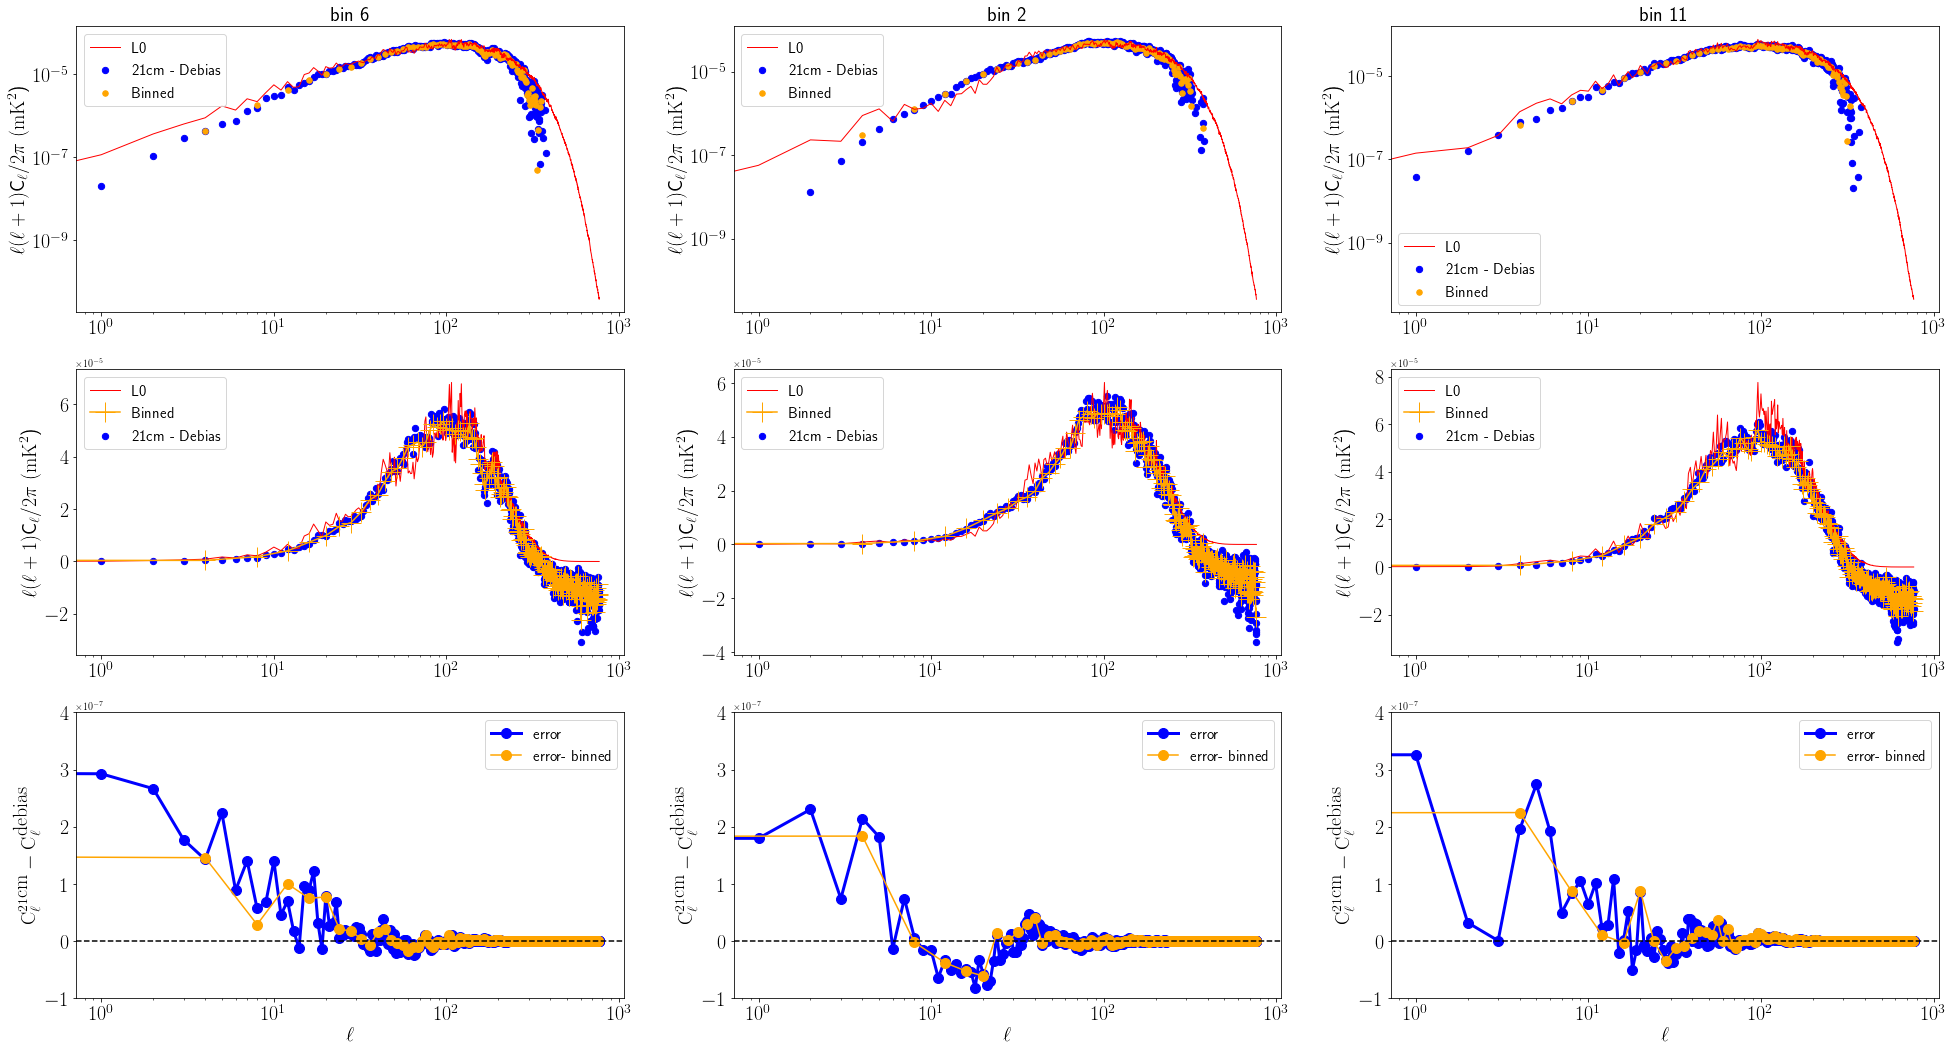

In [12]:
Cls = cs.loadcls(pathcls,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])
fig      = plt.figure()

numplots = 3
grid     = plt.GridSpec(3,2*numplots,top=3.5,right=3*numplots)
nu,nl = Cls_ndb.shape
l     = np.arange(nl)
fact  = l*(l+1)/(2*np.pi)
L0    = "L{}".format(seed_used)

for col,i in enumerate(np.random.randint(nu,size=numplots)):
    ax = plt.subplot(grid[0,col])
    #print("bin: {}".format(i))
    l_bin, cls_bin = cs.clsbinned(Cls_ndb[i],del_l=4,l0=0)
    fact_bin       = l_bin*(l_bin+1)/(2*np.pi)
    plt.title("bin {}".format(i), fontsize=20)
    plt.plot(   l,fact*Cls["pure"][L0][i] , color="red"  , label="L0"           , linewidth =1)
    plt.scatter(l,fact*Cls_ndb[i]         , color="blue" , label="21cm - Debias", s=40)
    plt.scatter(l_bin,fact_bin*cls_bin    , color="orange", label="Binned"      , s=30)
    plt.xscale("log")
    plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ $(\textrm{mK}^2$)", fontsize=20)
    #plt.xlabel(r"$\ell$", fontsize=20)
    plt.legend(fontsize=15)

    ax = plt.subplot(grid[1,col])
    #print("bin: {}".format(i))
    #plt.title("bin {}".format(i), fontsize=20)
    plt.plot(l,fact*Cls["pure"][L0][i] , color="red"   , label="L0"           , linewidth =1)
    plt.scatter(l,fact*Cls_ndb[i]      , color="blue"  , label="21cm - Debias", s=40)
    plt.plot(l_bin,fact_bin*cls_bin    , color="orange", label="Binned"      , marker="+", markersize=20)
    #plt.scatter(l,fact*Cls_noise[i]    , color="green", label="Debiasing", linewidth =1)
    plt.xscale("log")
    #plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ $(\textrm{mK}^2$)", fontsize=20)
    #plt.xlabel(r"$\ell$", fontsize=20)
    plt.legend(fontsize=15)    
    
    ax = plt.subplot(grid[2,col])
    inds = cs.index_cls_binned(l,l_bin)
    plt.plot(l      ,(Cls["pure"][L0][i]       - Cls_ndb[i]), color="blue"  , label="error", marker="o", markersize=10,linewidth =3)
    plt.plot(l[inds],(Cls["pure"][L0][i][inds] - cls_bin)   , color="orange", label="error- binned", marker="o", markersize=10)
    plt.axhline(y=0, linestyle="dashed", color="black")
    plt.xscale("log")
    #plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.ylabel(r"$\textrm{C}^{21\textrm{cm}}_{\ell} - \textrm{C}^{\textrm{debias}}_{\ell}$", fontsize=20)
    #plt.xlim(0,300)
    plt.ylim(-1e-7,4e-7)
    plt.legend(fontsize=15);    

## Mathieu
$\displaystyle  \hat{C}^{\scriptsize\textrm{GMCA}}_{\ell} = \frac{C^{\scriptsize\textrm{GMCA},\textrm{L}_0}_{\ell} -  C^{\tiny\textrm{proj NOISE}}_{\ell} }{S} $

$\displaystyle S = \langle \frac{C^{\scriptsize\textrm{proj pure},\textrm{L}_i}_{\ell}}{C^{\scriptsize\textrm{pure},\textrm{L}_i}_{\ell}} \rangle$


### OBS:
$\displaystyle \textrm{maps}^{A}_i=\mathbb{x}^{A}_{i} \longrightarrow \delta^A_{i} \longrightarrow a^{A,i}_{\ell,m} \longrightarrow C^{A,\textrm{L}_i}_{\ell} = \langle a^{A,i\dagger}_{\ell,m}a^{A,i}_{\ell,m} \rangle$ 

$A$ = type of map\
$i$ = realisation 


$\mathbb{W}_{\textrm{FG}}\mathbb{x}^{A}_{i}\longrightarrow \delta^{\scriptsize\textrm{proj A}}_{i} \longrightarrow a^{\scriptsize\textrm{proj A},i}_{\ell,m} \longrightarrow C^{\scriptsize\textrm{proj A},\textrm{L}_i}_{\ell}$


$\mathbb{W}_{\mathrm{FG}} = \hat{\mathbb{A}}\left(\hat{\mathbb{A}}^{T}\mathbb{C}^{-1}\hat{\mathbb{A}}\right)^{-1}\hat{\mathbb{A}}^{T}\mathbb{C}^{-1} = \hat{\mathbb{A}}\hat{\mathbb{A}}^{-} \mathbb{C}^{-1}$

$\mathbb{C}^{-1} = \mathbb{C}^{-1}_{\mathbb{x}_{\textrm{obs}}}$ ou $\mathbb{1}$



In [27]:
Cls = cs.loadcls(pathcls,dirs=[dir_hi, dir_fg, dir_prior, dir_noise, dir_pure, dir_projpure, dir_projnoise, dir_projprior])  
cls = cs.noisedebiasing(Cls_=Cls, seed_used=seed_used, dir_hi = dir_hi, dir_pure = dir_pure, dir_projpure=dir_projpure, dir_projnoise = dir_projnoise, type_="mathieu")
Cls_ndb   = cls["Cls_debias"]
S         = cls["S"]
Cls_noise = cls["Cls_noise"]

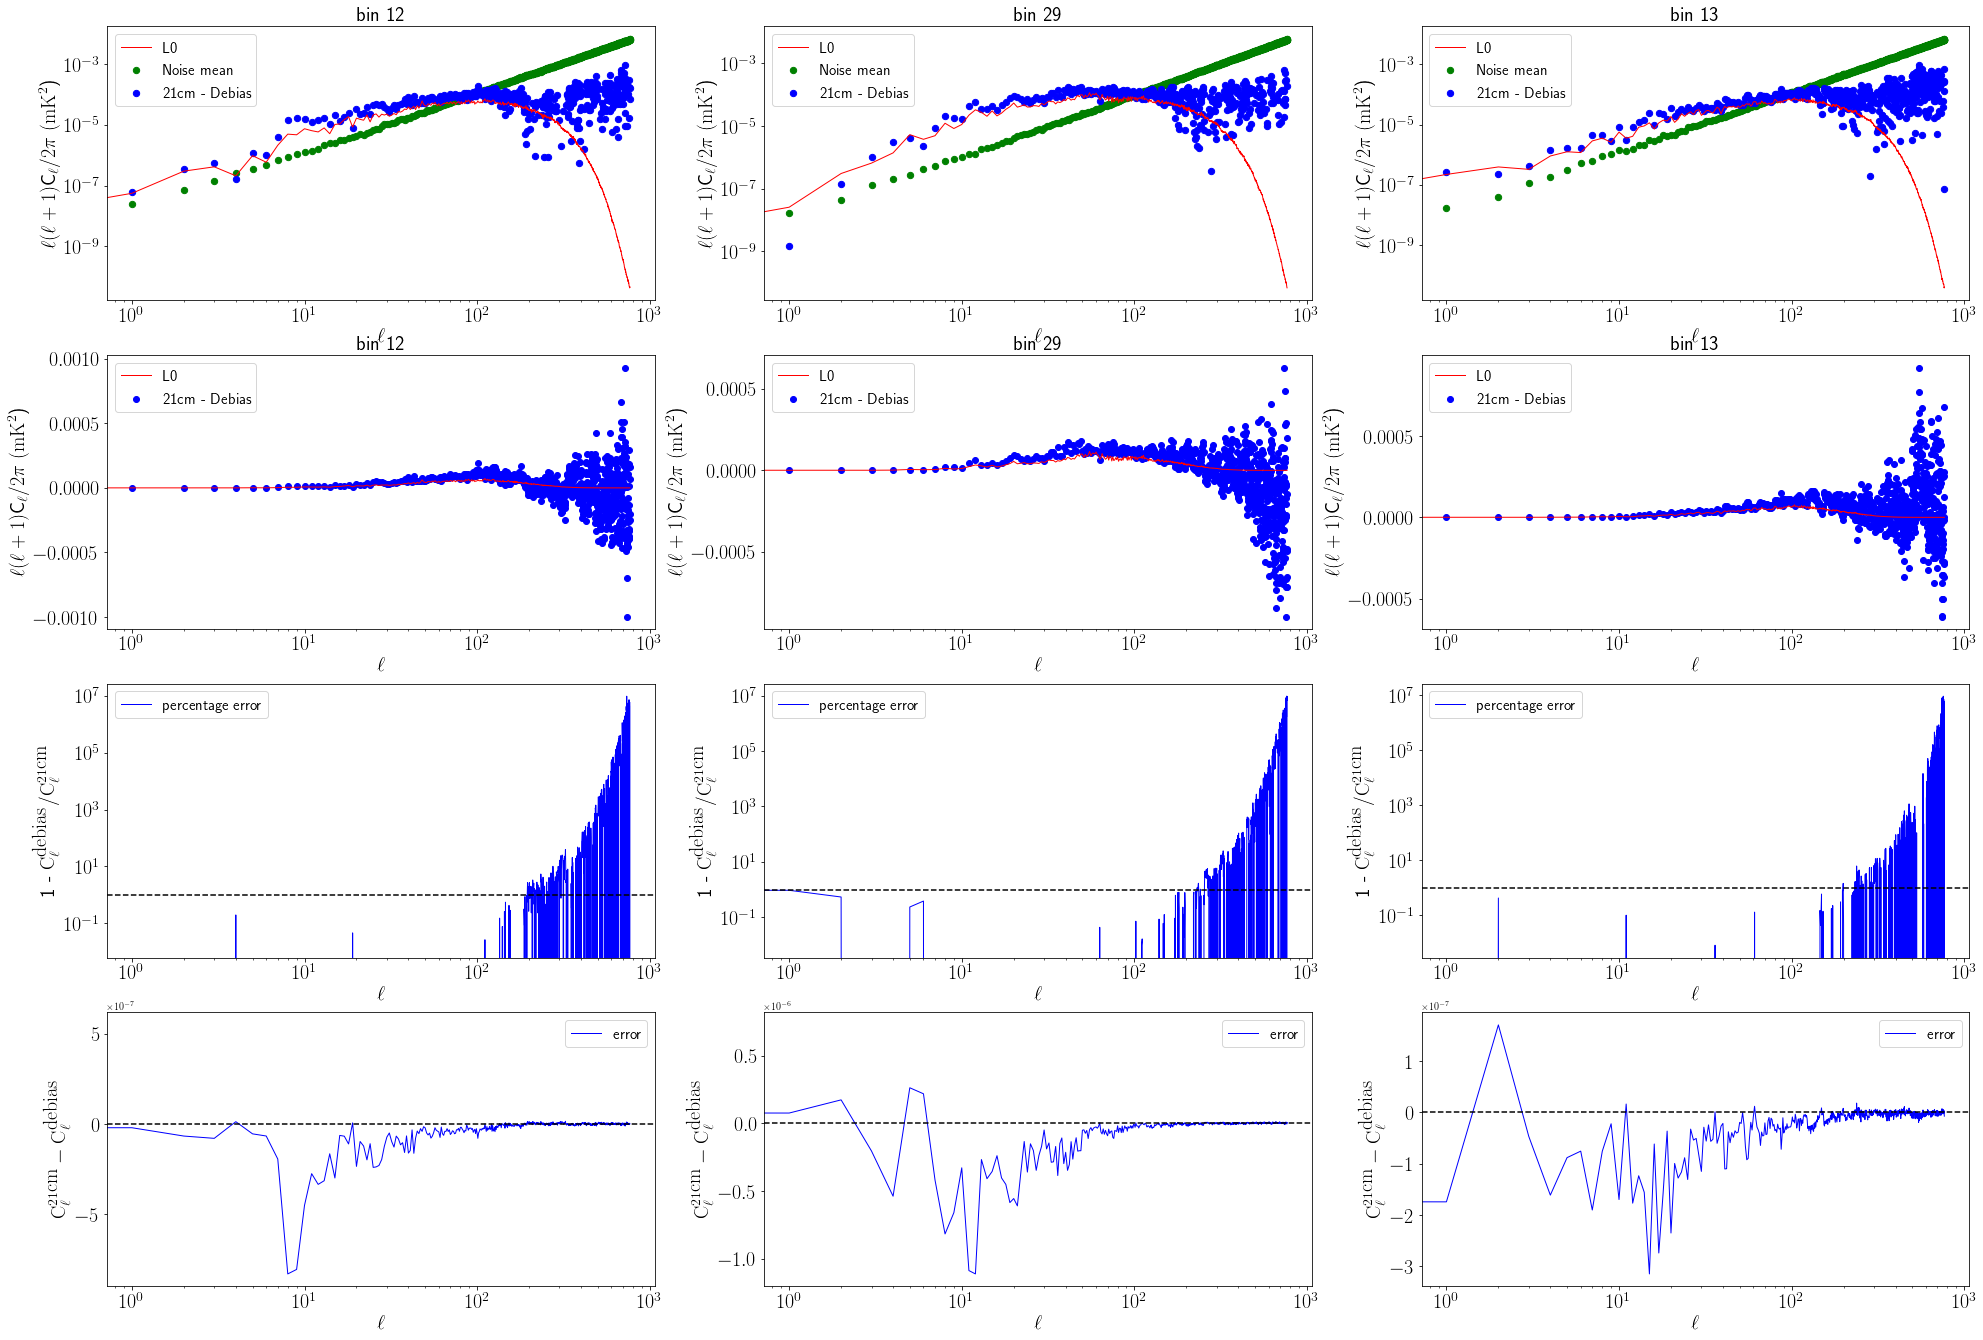

In [28]:
Cls = cs.loadcls(pathcls,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])
fig      = plt.figure()

numplots = 3
grid     = plt.GridSpec(4,2*numplots,top=4.5,right=3*numplots)
nu,nl = Cls_ndb.shape
l     = np.arange(nl)
fact  = l*(l+1)/(2*np.pi)
L0    = "L{}".format(seed_used)

for col,i in enumerate(np.random.randint(nu,size=numplots)):
    ax = plt.subplot(grid[0,col])
    #print("bin: {}".format(i))
    plt.title("bin {}".format(i), fontsize=20)
    plt.plot(   l,fact*Cls["pure"][L0][i] , color="red"  , label="L0"           , linewidth =1)
    plt.scatter(l,fact*Cls_noise[i]       , color="green", label="Noise mean"   , s=40)
    plt.scatter(l,fact*Cls_ndb[i]         , color="blue" , label="21cm - Debias", s=40)
    plt.xscale("log")
    plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ $(\textrm{mK}^2$)", fontsize=20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.legend(fontsize=15)

    ax = plt.subplot(grid[1,col])
    #print("bin: {}".format(i))
    plt.title("bin {}".format(i), fontsize=20)
    plt.plot(l,fact*Cls["pure"][L0][i] , color="red"  , label="L0"       , linewidth =1)
    plt.scatter(l,fact*Cls_ndb[i]      , color="blue" , label="21cm - Debias", linewidth =1)
    #plt.scatter(l,fact*Cls_noise[i]    , color="green", label="Debiasing", linewidth =1)
    plt.xscale("log")
    #plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ $(\textrm{mK}^2$)", fontsize=20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.legend(fontsize=15)    
    
    ax = plt.subplot(grid[2,col])
    plt.plot(l,(Cls["pure"][L0][i]-Cls_ndb[i])/Cls["pure"][L0][i] , color="blue", label="percentage error", linewidth =1)
    plt.axhline(y=1, linestyle="dashed", color="black")
    plt.xscale("log")
    plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.ylabel(r"1 - $\textrm{C}^{\textrm{debias}}_{\ell}/\textrm{C}^{21\textrm{cm}}_{\ell}$", fontsize=20)
    #plt.xlim(0,300)
    #plt.ylim(1e-6,1e-2)
    plt.legend(fontsize=15)
    
    ax = plt.subplot(grid[3,col])
    plt.plot(l,(Cls["pure"][L0][i]-Cls_ndb[i]) , color="blue", label="error", linewidth =1)
    plt.axhline(y=0, linestyle="dashed", color="black")
    plt.xscale("log")
    #plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.ylabel(r"$\textrm{C}^{21\textrm{cm}}_{\ell} - \textrm{C}^{\textrm{debias}}_{\ell}$", fontsize=20)
    #plt.xlim(0,300)
    #plt.ylim(1e-6,1e-2)
    plt.legend(fontsize=15);    

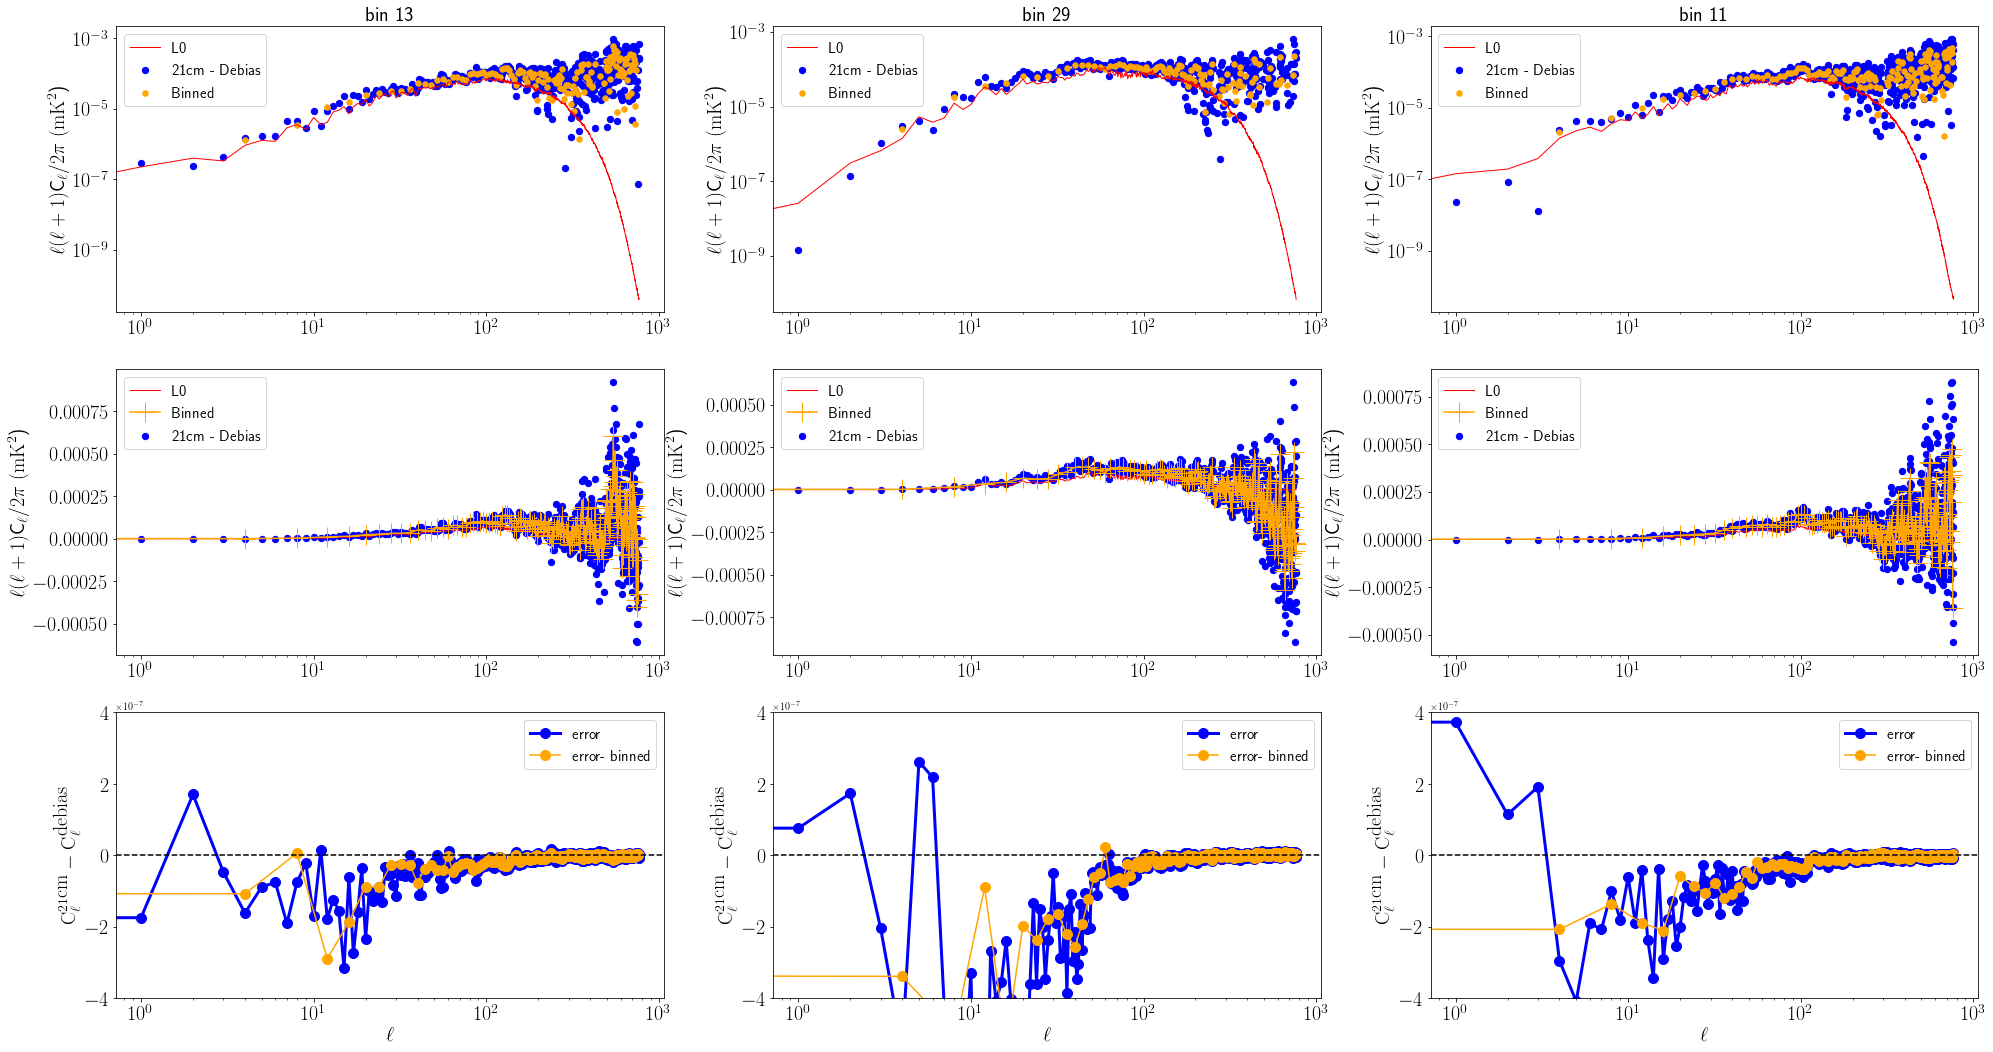

In [30]:
Cls = cs.loadcls(pathcls,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])
fig      = plt.figure()

numplots = 3
grid     = plt.GridSpec(3,2*numplots,top=3.5,right=3*numplots)
nu,nl = Cls_ndb.shape
l     = np.arange(nl)
fact  = l*(l+1)/(2*np.pi)
L0    = "L{}".format(seed_used)

for col,i in enumerate(np.random.randint(nu,size=numplots)):
    ax = plt.subplot(grid[0,col])
    #print("bin: {}".format(i))
    l_bin, cls_bin = cs.clsbinned(Cls_ndb[i],del_l=4,l0=0)
    fact_bin       = l_bin*(l_bin+1)/(2*np.pi)
    plt.title("bin {}".format(i), fontsize=20)
    plt.plot(   l,fact*Cls["pure"][L0][i] , color="red"  , label="L0"           , linewidth =1)
    plt.scatter(l,fact*Cls_ndb[i]         , color="blue" , label="21cm - Debias", s=40)
    plt.scatter(l_bin,fact_bin*cls_bin    , color="orange", label="Binned"      , s=30)
    plt.xscale("log")
    plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ $(\textrm{mK}^2$)", fontsize=20)
    #plt.xlabel(r"$\ell$", fontsize=20)
    plt.legend(fontsize=15)

    ax = plt.subplot(grid[1,col])
    #print("bin: {}".format(i))
    #plt.title("bin {}".format(i), fontsize=20)
    plt.plot(l,fact*Cls["pure"][L0][i] , color="red"   , label="L0"           , linewidth =1)
    plt.scatter(l,fact*Cls_ndb[i]      , color="blue"  , label="21cm - Debias", s=40)
    plt.plot(l_bin,fact_bin*cls_bin    , color="orange", label="Binned"      , marker="+", markersize=20)
    #plt.scatter(l,fact*Cls_noise[i]    , color="green", label="Debiasing", linewidth =1)
    plt.xscale("log")
    #plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ $(\textrm{mK}^2$)", fontsize=20)
    #plt.xlabel(r"$\ell$", fontsize=20)
    plt.legend(fontsize=15)    
    
    ax = plt.subplot(grid[2,col])
    inds = cs.index_cls_binned(l,l_bin)
    plt.plot(l      ,(Cls["pure"][L0][i]       - Cls_ndb[i]), color="blue"  , label="error", marker="o", markersize=10,linewidth =3)
    plt.plot(l[inds],(Cls["pure"][L0][i][inds] - cls_bin)   , color="orange", label="error- binned", marker="o", markersize=10)
    plt.axhline(y=0, linestyle="dashed", color="black")
    plt.xscale("log")
    #plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.ylabel(r"$\textrm{C}^{21\textrm{cm}}_{\ell} - \textrm{C}^{\textrm{debias}}_{\ell}$", fontsize=20)
    #plt.xlim(0,300)
    plt.ylim(-4e-7,4e-7)
    plt.legend(fontsize=15);    